# Random Forest Classifier for Prediction

Load dataset

In [43]:
import pandas as pd
df = pd.read_csv('features.csv')

In [44]:
df.fillna(0)

,id,polarity,subjectivity,cred_score,publisher_val,publisher,entity_dict,entity_num,entity_type_num,num_quote,quote_subjectivity,quote_polarity,num_sentences,polarity_avg,polarity sd,polarity median,polarity min-max,polarity range
0,204f5d99-c9de-4bce-ae2f-5e98085b4930,0.143893,0.459627,medium,0,gazette,"{'PERSON': ['Dianne Primavera', 'Scott Helker'...",54,9,0.0,0.000000,0.000000,67,0.098586,0.996120,0.512702,0.999765,0.487063
1,0526bd0d-41bb-43fe-bdc9-dabeea9dcfaa,0.031300,0.304625,high,1,abs-cbnnews,"{'PERSON': ['Sherwin Gatchalian'], 'CARDINAL':...",22,8,8.0,0.128299,0.048438,14,0.104742,0.970806,0.649317,0.997335,0.348019
2,33e5aa3f-af33-461d-9e51-16a552e6b985,-0.022487,0.393404,high,1,abs-cbnnews,"{'PERSON': ['Juan Ponce Enrile', 'Leila de Lim...",39,7,16.0,0.399621,-0.031676,38,0.148517,0.983013,0.534387,0.999732,0.465345
3,d10f9f69-204a-422d-886d-ff59f787fe22,0.099619,0.325952,high,1,abs-cbnnews,"{'PERSON': ['Ann Wang', 'Fidel Macauyag', 'Ang...",33,8,0.0,0.000000,0.000000,14,0.121905,0.989187,0.519855,0.998280,0.478425
4,88ffc85f-b495-4f59-af53-08a92030f9b7,0.030585,0.354436,high,1,abs-cbnnews,"{'PERSON': ['Juan Ponce Enrile', 'Mike Navallo...",36,8,0.0,0.000000,0.000000,20,0.125476,0.978501,0.552804,0.999631,0.446827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40676,9634e440-9a90-491e-8db6-e47c9d8b9365,0.443056,0.888889,medium,1462,0,"{'PERSON': ['de la loi', 'la loi', 'Moi qui', ...",51,8,0.0,0.000000,0.000000,28,0.138213,0.939167,0.522224,0.996462,0.474239
40677,e31459f3-7f90-4b5b-9f9f-f64dd7c27a95,0.275000,0.500000,high,1496,0,"{'PERSON': ['nos yeux', '(de l’aide', 'colonne...",54,11,0.0,0.000000,0.000000,35,0.135245,0.909855,0.515787,0.981923,0.466135
40678,e7b08fa7-f9c3-47b6-96b0-af8d4171f9c3,-0.495238,0.866667,high,1496,0,"{'PERSON': ['Rosemary DiCarlo', 'de nationalit...",44,4,1.0,0.533333,-0.383333,17,0.149226,0.889700,0.548900,0.989486,0.440587
40679,4d99cf53-bd69-492a-8493-041b553f8543,0.284615,0.623077,high,1496,0,"{'PERSON': ['de haine et de', 'autorités ghané...",102,13,0.0,0.000000,0.000000,38,0.145836,0.796014,0.531077,0.967778,0.436701


Map credibility score values to integers

In [11]:
# d = {'low':0, 'medium':1, 'high':2}
d = {'medium':1, 'high':2}
df['cred_score'] = df['cred_score'].map(d)

Separate the dataset columns into dependent and independent variables (features and labels) and then split the variables into training and testing set

In [12]:
# import train_test_split function
from sklearn.model_selection import train_test_split

features = ['polarity', 'subjectivity', 'publisher_val', 'entity_num', 'entity_type_num', 'num_quote', 'quote_subjectivity', 'quote_polarity', 
            'num_sentences', 'polarity_avg', 'polarity sd', 'polarity median', 'polarity min-max', 'polarity range']

labels = ['cred_score']

X = df[features]
y = df[labels]

# split data into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)  # 10% testing and 90% training

In [41]:
# prevent "Input contains NaN, infinity or a value too large for dtype('float32')." error when fitting models
df = df.reset_index()
df.fillna(0)

X_test.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean())
X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())
X_test._is_view

False

# Define functions to report performance information on models.

In [155]:
# fit a defined model
def train_model(model):
    model.fit(X_train.fillna(0), y_train.values.ravel())

In [156]:
# get the set of labels predicted by the model
def get_predicted_labels(model, X_test):
    labels = model.predict(X_test)
    return labels

In [157]:
# y_test is already defined, y_pred comes from the model
def print_model_accuracy(y_test, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {accuracy}")

In [203]:
# calculate and return feature importance scores using the classifier's feature_importances_ function
def display_model_feature_importance(model, features):
    print("Feature Importance from Model")
    print('-'*30)
    # calculate feature importance scores
    # importance_scores = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
    # importance_scores = model.best_estimator_._final_estimator.feature_importances_
    importance_scores = np.mean([tree.feature_importances_ for tree in model.estimators_], axis=0)
    
    # print features & their scores
    print_importance_scores(importance_scores)
    
    # create bar graph and display features & their scores using seaborn
    sb.barplot(x=importance_scores, y=features)  # y=importance_scores.index
    
    # add labels
    plt.title("Model's Feature Importance Graph")
    plt.xlabel('Importance Scores')
    plt.ylabel('Features')
    plt.show()

In [179]:
from sklearn.inspection import permutation_importance

# calculate and return feature importance using permutation_importance
def display_permutation_feature_importance(model, X):
    print("Permutation Feature Importance")
    print('-'*30)
    # calculate permutation importance
    results = permutation_importance(model, X.fillna(0), y, scoring='accuracy')
    importance_scores = results.importances_mean
    
    # print features & their scores
    print_importance_scores(importance_scores)

    # create bar graph and display features & their scores using seaborn
    sb.barplot(x=importance_scores, y=list(X.columns))
    
    # add labels
    plt.title('Permutation Feature Importance Graph')
    plt.xlabel('Importance Scores')
    plt.ylabel('Features')
    plt.show()

In [196]:
import numpy as np
import matplotlib.pyplot as plt

# get the feature importance based on Mean Decrease in Impurity
def display_mdi_feature_importance(model, features):
    print("Feature Importance based on Mean Decrease in Impurity(MDI)")
    print('-'*50)
    # importances = model.feature_importances_
    importances = np.mean([tree.feature_importances_ for tree in model.estimators_], axis=0)
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    importance_scores = pd.Series(importances, index=features)
    model_importances = pd.Series(importances, index=features)

    # plot the features and their scores on a bar graph using matplotlib
    fig, ax = plt.subplots()
    model_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()

In [161]:
# print feature importance scores
def print_importance_scores(importance_scores):
    for i,v in enumerate(importance_scores):
        print('Feature: %0d, Score: %.5f' % (i,v))

In [180]:
import random
from sklearn.metrics import classification_report

# get the labels predicted by a model, pass to the function & print the classification report
def display_classification_report(y_pred):
    print("Classification Report:")
    print('-'*22)
    y_true = [random.randint(0,2) for _ in range(len(y_pred))]  # randomly generated true values
    target_names = ['medium', 'high']
    print(classification_report(y_true, y_pred, target_names=target_names, labels=[1,2]))

In [163]:
# import confusion matrix from metrics package
from sklearn.metrics import confusion_matrix

# create a confusion matrix
def create_confusion_matrix(y_test, y_pred):  # evaluating the classifier using metrics
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
    return cm_df

In [184]:
# report metrics using values from the confusion matrix
def report_classification_metrics(cm):
    print("\nClassification Metrics:")
    print('-'*23)
    TP = cm['Predicted Positive'][1]
    TN = cm['Predicted Negative'][0]
    FP = cm['Predicted Positive'][0]
    FN = cm['Predicted Negative'][1]
    
    print(f'True Positives: {TP}')
    print(f'True Negatives: {TN}')
    print(f'False Positives: {FP}')
    print(f'False Negatives: {FN}')
    print()
    
    # calculate True Positive Rate & False Positive Rate
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    print(f'True Positive Rate: {TPR}')
    print(f'False Positive Rate: {FPR}')
    
    # calculate the six metrics that matter
    total = sum([TP, TN, FP, FN])
    accuracy = (float(TP+TN)/float(total))
    mis_classification = 1 - accuracy
    sensitivity = (TP/float(FN+TP))
    specificity = (TN/float(TN+FP))
    precision = (TP/float(TP+FP))
    f1_score = 2 * ((precision * sensitivity)/(precision + sensitivity))
    
    # display results
    print("\nThe 6 metrics:")
    print('-'*15)
    print(f'Accuracy: {round(accuracy, 2)}')
    print(f'Mis-classification: {round(mis_classification, 2)}')
    print(f'Sensitivity: {round(sensitivity, 2)}')
    print(f'Specificty: {round(specificity, 2)}')
    print(f'Precision: {round(precision, 2)}')
    print(f'F1 Score: {round(f1_score, 2)}')

In [165]:
from sklearn.metrics import roc_auc_score

# calculate & display the roc auc score
def print_roc_auc_score(model, X, y):
    score = roc_auc_score(y, model.predict_proba(X.fillna(0))[:, 1])
    print(f'ROC AUC Score: {score}')

In [166]:
# calculate & display the mean roc auc score
def print_mean_roc_auc_score(model, X, y):  # takes a model & displays the results, plots a ROC AUC graph
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X.fillna(0), y, scoring='roc_auc', cv=cv, n_jobs=-1)
    mean_score = mean(scores)
    print(f'Mean ROC AUC Score: {mean_score}')

In [167]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm

def plot_roc_curve(model):
    metrics.plot_roc_curve(model, X_test, y_test)
    plt.title('ROC Curve')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [185]:
# takes a model & prints all info associated with the model
def analyze_model(model, X, X_test, y_test, features):
    train_model(model)
    y_pred = get_predicted_labels(model, X_test)
    print_model_accuracy(y_test, y_pred)
    print()
    display_model_feature_importance(model, features)
    display_permutation_feature_importance(model, X)
    display_mdi_feature_importance(model, features)
    print()
    display_classification_report(y_pred)
    cm = create_confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    display(cm)
    report_classification_metrics(cm)
    print()
    print_roc_auc_score(model, X, y)
    print()
    print_mean_roc_auc_score(rfc_model, X, y)
    print()
    plot_roc_curve(rfc_model)

# End of functions definition

Accuracy Score: 0.9107888916195626

Feature Importance from Model
------------------------------
Feature: 0, Score: 0.28152
Feature: 1, Score: 0.08219
Feature: 2, Score: 0.07864
Feature: 3, Score: 0.06959
Feature: 4, Score: 0.06731
Feature: 5, Score: 0.06725
Feature: 6, Score: 0.06403
Feature: 7, Score: 0.06212
Feature: 8, Score: 0.06037
Feature: 9, Score: 0.05471
Feature: 10, Score: 0.03748
Feature: 11, Score: 0.02845
Feature: 12, Score: 0.02531
Feature: 13, Score: 0.02103


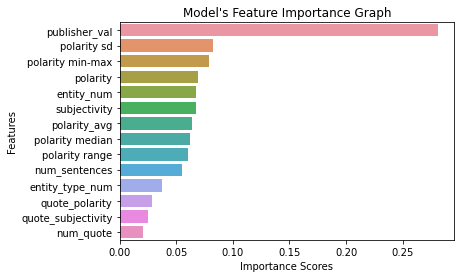

Permutation Feature Importance
------------------------------
Feature: 0, Score: 0.01531
Feature: 1, Score: 0.00886
Feature: 2, Score: 0.12202
Feature: 3, Score: 0.01884
Feature: 4, Score: 0.00163
Feature: 5, Score: 0.00145
Feature: 6, Score: 0.00217
Feature: 7, Score: 0.00191
Feature: 8, Score: 0.00797
Feature: 9, Score: 0.00533
Feature: 10, Score: 0.01813
Feature: 11, Score: 0.00189
Feature: 12, Score: 0.01272
Feature: 13, Score: 0.00245


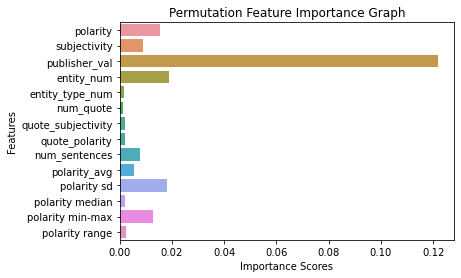

Feature Importance based on Mean Decrease in Impurity(MDI)
------------------------------

Classification Report:
----------------------
              precision    recall  f1-score   support

      medium       0.35      0.09      0.14      1412
        high       0.32      0.91      0.48      1313

   micro avg       0.33      0.49      0.39      2725
   macro avg       0.34      0.50      0.31      2725
weighted avg       0.34      0.49      0.30      2725


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,298,306
Actual Positive,57,3408



Classification Metrics:
-----------------------
True Positives: 3408
True Negatives: 298
False Positives: 306
False Negatives: 57

True Positive Rate: 0.9835497835497835
False Positive Rate: 0.5066225165562914

The 6 metrics:
---------------
Accuracy: 0.91
Mis-classification: 0.09
Sensitivity: 0.98
Specificty: 0.49
Precision: 0.92
F1 Score: 0.95

ROC AUC Score: 0.9985949999932183

Mean ROC AUC Score: 0.9525719303799817



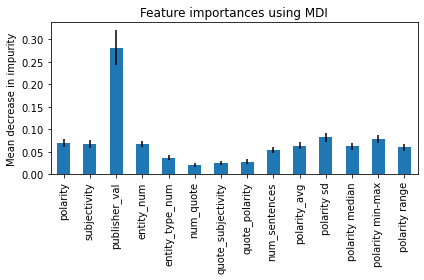

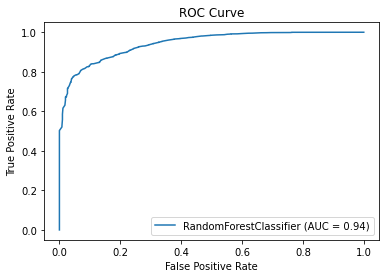

total time taken: 0:02:20.378015


In [186]:
import datetime
start = datetime.datetime.now()

new_model = RandomForestClassifier(n_estimators=100)
analyze_model(new_model, X, X_test, y_test, features)

end = datetime.datetime.now()
print(f'total time taken: {end-start}')

# 1. Define and train models
    Train each model on the training set and perform predictions on the testing set.

# 2. Get the set of labels predicted by each model.

# 3. Report the accuracy score of each model.

# 4. Find important features from each model

# 5. Visualize feature importance scores for easy understanding & interpretation
    a. Random Forest Classification for Feature Importance
    b. Permutation Feature Importance for Classification
    c. Feature Importance based on Mean Decrease in Impurity

# 6. Display Classification Report

# 7. Create a Confusion Matrix

# 8. Evaluate Classifier using Classification Metrics

# Start

In [46]:
'''1. Define and train the model'''

from sklearn.ensemble import RandomForestClassifier

# define model
rfc = RandomForestClassifier(n_estimators=100)

# fit the model
train_model(rfc)

In [47]:
'''2. Get set of labels predicted by the model'''
# set of labels predicted by the model
y_pred = rfc.predict(X_test)

In [48]:
'''3. Report the model accuracy score'''
# import sklearn's metrics model for accuracy calculation
from sklearn import metrics
# check model's accuracy
print(f'model accuracy: {metrics.accuracy_score(y_test, y_pred)}')

model accuracy: 0.9090685672155321


In [50]:
'''4. Find the model's important features'''
import pandas as pd
# feature importance
feature_importance = pd.Series(rfc.feature_importances_,index=features).sort_values(ascending=False)
# print the features and their importance scores
feature_importance

publisher_val         0.276470
polarity sd           0.081410
polarity min-max      0.079582
polarity              0.069764
subjectivity          0.067606
polarity median       0.065903
entity_num            0.065866
polarity_avg          0.063750
polarity range        0.061055
num_sentences         0.055130
entity_type_num       0.037046
quote_polarity        0.029240
quote_subjectivity    0.025648
num_quote             0.021530
dtype: float64

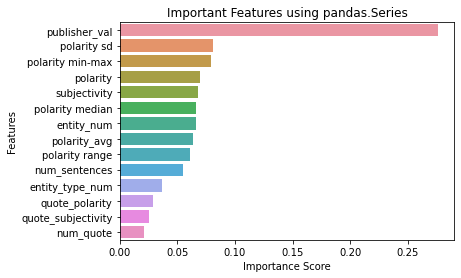

In [51]:
'''5. Visualize the models importance scores'''
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
# create bar plot
sb.barplot(x=feature_importance, y=feature_importance.index)
# add labels
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title("Important Features using pandas.Series")
plt.show()

5.a Random Forest Classifier feature importance

Feature: 0, Score: 0.06976
Feature: 1, Score: 0.06761
Feature: 2, Score: 0.27647
Feature: 3, Score: 0.06587
Feature: 4, Score: 0.03705
Feature: 5, Score: 0.02153
Feature: 6, Score: 0.02565
Feature: 7, Score: 0.02924
Feature: 8, Score: 0.05513
Feature: 9, Score: 0.06375
Feature: 10, Score: 0.08141
Feature: 11, Score: 0.06590
Feature: 12, Score: 0.07958
Feature: 13, Score: 0.06105


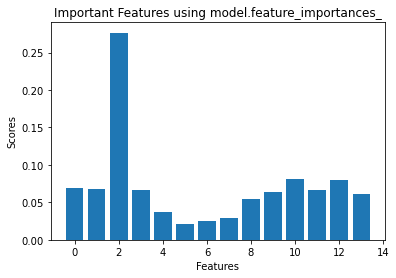

In [52]:
'''using matplotlib'''
# use the random forest classifier for feature importance
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import seaborn as sb
# get importance
importance = rfc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance using matplotlib
plt.title('Important Features using model.feature_importances_')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.bar([x for x in range(len(importance))], importance)
plt.show()

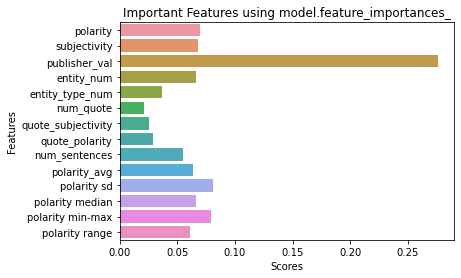

In [53]:
'''using seaborn'''
# plot feature importance using seaborn
sb.barplot(x=importance, y=features)
plt.title('Important Features using model.feature_importances_')
plt.xlabel('Scores')
plt.ylabel('Features')
plt.show()

5.b Permutation Feature Importance for Classification

Feature: 0, Score: 0.01464
Feature: 1, Score: 0.01043
Feature: 2, Score: 0.11770
Feature: 3, Score: 0.01888
Feature: 4, Score: 0.00256
Feature: 5, Score: 0.00064
Feature: 6, Score: 0.00149
Feature: 7, Score: 0.00212
Feature: 8, Score: 0.00981
Feature: 9, Score: 0.00490
Feature: 10, Score: 0.01792
Feature: 11, Score: 0.00195
Feature: 12, Score: 0.01538
Feature: 13, Score: 0.00230


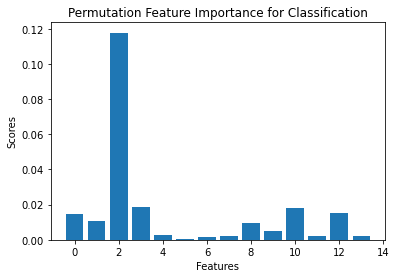

In [54]:
'''using matplotlib'''
# permutation feature importance
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
# perform permutation importance
results = permutation_importance(rfc, X.fillna(0), y, scoring='accuracy')
# get importance
pf_importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(pf_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance with matplotlib
plt.title('Permutation Feature Importance for Classification')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.bar([x for x in range(len(pf_importance))], pf_importance)
plt.show()

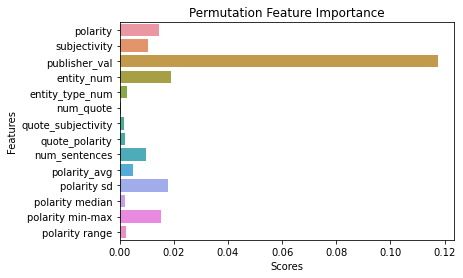

In [55]:
'''using seaborn'''
# plot feature importance with seaborn
sb.barplot(x=pf_importance, y=features)
plt.title('Permutation Feature Importance')
plt.xlabel('Scores')
plt.ylabel('Features')
plt.show()

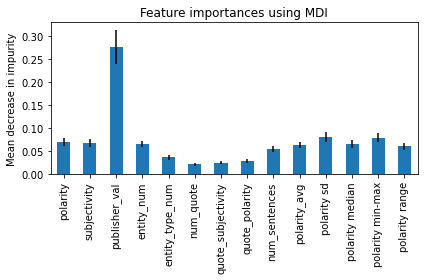

In [60]:
'''5.c Feature Importance based on Mean Decrease in Impurity'''
# plot impurity-based importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
feature_names = [f'feature {i}' for i in range(X.shape[1])]
model_importances = pd.Series(importances, index=features)
fig, ax = plt.subplots()
model_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [61]:
'''6. Display Classification Report'''
# classification report
from sklearn.metrics import classification_report
import random
y_true = [random.randint(0,2) for _ in range(len(y_pred))]  # randomly generate true values
target_names = ['low', 'medium', 'high']
print(classification_report(y_true, y_pred, target_names=target_names))
# specify the labels param
print('\nwith the labels parameter specified:\n')
print(classification_report(y_true, y_pred, labels=[0,1,2]))

              precision    recall  f1-score   support

         low       0.00      0.00      0.00      1401
      medium       0.33      0.09      0.14      1284
        high       0.34      0.92      0.50      1384

    accuracy                           0.34      4069
   macro avg       0.22      0.33      0.21      4069
weighted avg       0.22      0.34      0.21      4069


with the labels parameter specified:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1401
           1       0.33      0.09      0.14      1284
           2       0.34      0.92      0.50      1384

    accuracy                           0.34      4069
   macro avg       0.22      0.33      0.21      4069
weighted avg       0.22      0.34      0.21      4069



C:\Users\STEPHEN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\STEPHEN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\STEPHEN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\STEPHEN\anaconda3\lib\site-packages\skle

In [62]:
'''7. Create a confusion matrix'''
# Using a confusion matrix
# import metrics package
from sklearn import metrics
# create confusion matrix
def confusion_matrix(y_test, y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
    return cm_df
# initialize and display the matrix
cm = confusion_matrix(y_test, y_pred)
cm

,Predicted Negative,Predicted Positive
Actual Negative,284,320
Actual Positive,50,3415


In [63]:
'''8. Evaluate classifier using classification metrics'''
# report metrics
def report_metrics(cm):
    TP = cm['Predicted Positive'][1]
    TN = cm['Predicted Negative'][0]
    FP = cm['Predicted Positive'][0]
    FN = cm['Predicted Negative'][1]
    
    print(f'True Positives: {TP}')
    print(f'True Negatives: {TN}')
    print(f'False Positives: {FP}')
    print(f'False Negatives: {FN}')
    
    # calculate the six metrics
    total = sum([TP, TN, FP, FN])
    accuracy = (float(TP+TN)/float(total))
    mis_classification = 1 - accuracy
    sensitivity = (TP/float(FN+TP))
    specificity = (TN/float(TN+FP))
    precision = (TP/float(TP+FP))
    f1_score = 2 * ((precision * sensitivity)/(precision + sensitivity))
    
    # display results
    print('-'*20)
    print(f'Accuracy: {round(accuracy, 2)}')
    print(f'Mis-classification: {round(mis_classification, 2)}')
    print(f'Sensitivity/Recall: {round(sensitivity, 2)}')
    print(f'Specificty: {round(specificity, 2)}')
    print(f'Precision: {round(precision, 2)}')
    print(f'F1 Score: {round(f1_score, 2)}')

    
# report the metrics
report_metrics(cm)

True Positives: 3415
True Negatives: 284
False Positives: 320
False Negatives: 50
--------------------
Accuracy: 0.91
Mis-classification: 0.09
Sensitivity/Recall: 0.99
Specificty: 0.47
Precision: 0.91
F1 Score: 0.95


# End

# Testing functions to ensure they all work

# 1. Define and train models
    Train each model on the training set and perform predictions on the testing set.

# 2. Get the set of labels predicted by each model.

# 3. Report the accuracy score of each model.

# 4. Find important features from each model

# 5. Visualize feature importance scores for easy understanding & interpretation
    a. Random Forest Classification for Feature Importance
    b. Permutation Feature Importance for Classification
    c. Feature Importance based on Mean Decrease in Impurity

# 6. Display Classification Report

# 7. Create a Confusion Matrix

# 8. Evaluate Classifier using Classification Metrics

# 9. Display ROC AUC Score

# 10. Display Mean ROC AUC Score

# 11. Plot an ROC AUC Curve

In [104]:
# import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas as pd
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import random
from sklearn.metrics import confusion_matrix
from numpy import mean

In [105]:
'''1. Define and train the model'''

# define model & fit the model
rfc_model = RandomForestClassifier(n_estimators=100)
train_model(rfc_model)

In [106]:
'''2. Get the set of labels predicted by the model.'''

# get the set of labels predicted by each model
rfc_y_pred = get_predicted_labels(rfc_model, X_test)

In [135]:
'''3. Report the accuracy score of each model.'''

# calculate & print the classifier's accuracy score
print_model_accuracy(y_test, rfc_y_pred)

Accuracy Score: 0.9117719341361514


In [115]:
'''4. Find & Visualize Feature Importance Scores for Easy Understanding & Interpretation'''

# display feature importance info

Feature: 0, Score: 0.27708
Feature: 1, Score: 0.08042
Feature: 2, Score: 0.07946
Feature: 3, Score: 0.06945
Feature: 4, Score: 0.06677
Feature: 5, Score: 0.06599
Feature: 6, Score: 0.06592
Feature: 7, Score: 0.06546
Feature: 8, Score: 0.06134
Feature: 9, Score: 0.05594
Feature: 10, Score: 0.03642
Feature: 11, Score: 0.02876
Feature: 12, Score: 0.02601
Feature: 13, Score: 0.02099


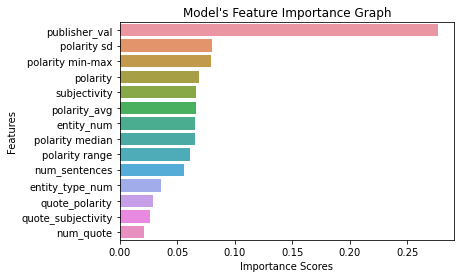

In [116]:
# a. Model's Feature Importance
display_model_feature_importance(rfc_model, features)

Feature: 0, Score: 0.01479
Feature: 1, Score: 0.01077
Feature: 2, Score: 0.12002
Feature: 3, Score: 0.01865
Feature: 4, Score: 0.00188
Feature: 5, Score: 0.00122
Feature: 6, Score: 0.00146
Feature: 7, Score: 0.00203
Feature: 8, Score: 0.00902
Feature: 9, Score: 0.00492
Feature: 10, Score: 0.01893
Feature: 11, Score: 0.00301
Feature: 12, Score: 0.01680
Feature: 13, Score: 0.00259


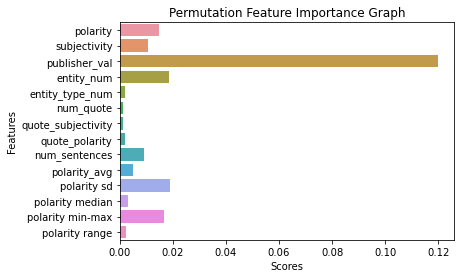

In [117]:
# b. Permutation Feature Importance
display_permutation_feature_importance(rfc_model, X)

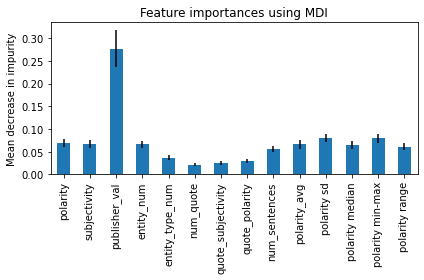

In [118]:
# c. Feature Importance based on Mean Decrease in Impurity
display_mdi_feature_importance(rfc_model, features)

In [124]:
'''6. Display Classification Report'''

display_classification_report(rfc_y_pred)

              precision    recall  f1-score   support

      medium       0.35      0.09      0.14      1346
        high       0.33      0.92      0.49      1330

   micro avg       0.33      0.50      0.40      2676
   macro avg       0.34      0.51      0.31      2676
weighted avg       0.34      0.50      0.31      2676



In [137]:
'''7. Create a Confusion Matrix'''

conf_matrix = create_confusion_matrix(y_test, rfc_y_pred)

# display confusion matrix
conf_matrix

,Predicted Negative,Predicted Positive
Actual Negative,292,312
Actual Positive,47,3418


In [126]:
'''8. Evaluate Classifier using Classification Metrics'''

# display classification metrics
report_classification_metrics(conf_matrix)

True Positives: 3418
True Negatives: 292
False Positives: 312
False Negatives: 47
--------------------
True Positive Rate: 0.9864357864357864
False Positive Rate: 0.5165562913907285
--------------------
Classification Metrics:
Accuracy: 0.91
Mis-classification: 0.09
Sensitivity: 0.99
Specificty: 0.48
Precision: 0.92
F1 Score: 0.95


In [139]:
'''9. Display ROC AUC Score'''

# calculate & print roc auc score 
print_roc_auc_score(rfc_model, X, y)

ROC AUC Score: 0.9987113799108687


In [141]:
'''10. Display Mean ROC AUC Score'''
# calculate & print mean roc auc score
print_mean_roc_auc_score(rfc_model, X, y)

Mean ROC AUC Score: 0.9519902746831973


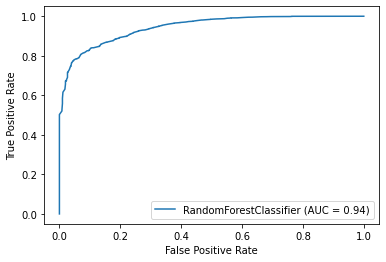

In [143]:
'''11. Plot an ROC AUC Curve'''
plot_roc_curve(rfc_model)

# End of function testing

# Dealing with imbalanced data
    1. import models
    2. load dataset
    3. define model
    4. define evaluation procedure
    5. evaluate model
    6. summarize performance

In [188]:
# import libraries & models
import datetime
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

Accuracy Score: 0.9714917670189236

Feature Importance from Model
------------------------------
Feature: 0, Score: 0.03506
Feature: 1, Score: 0.02922
Feature: 2, Score: 0.70214
Feature: 3, Score: 0.03779
Feature: 4, Score: 0.01870
Feature: 5, Score: 0.01020
Feature: 6, Score: 0.01028
Feature: 7, Score: 0.01300
Feature: 8, Score: 0.02542
Feature: 9, Score: 0.02231
Feature: 10, Score: 0.03758
Feature: 11, Score: 0.01681
Feature: 12, Score: 0.02918
Feature: 13, Score: 0.01231


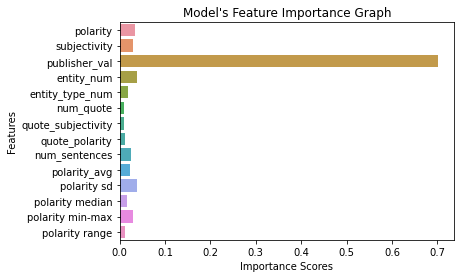

Permutation Feature Importance
------------------------------
Feature: 0, Score: 0.00746
Feature: 1, Score: 0.01481
Feature: 2, Score: 0.30044
Feature: 3, Score: 0.01927
Feature: 4, Score: 0.00228
Feature: 5, Score: 0.00204
Feature: 6, Score: 0.00205
Feature: 7, Score: 0.00291
Feature: 8, Score: 0.00919
Feature: 9, Score: 0.00607
Feature: 10, Score: 0.03285
Feature: 11, Score: 0.00477
Feature: 12, Score: 0.01339
Feature: 13, Score: 0.00158


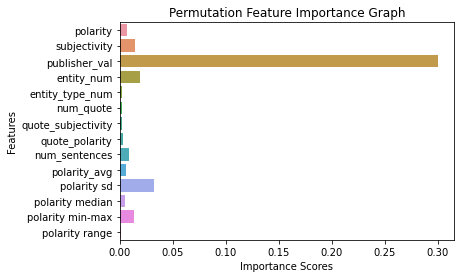

Feature Importance based on Mean Decrease in Impurity(MDI)
--------------------------------------------------

Classification Report:
----------------------
              precision    recall  f1-score   support

      medium       0.36      0.15      0.21      1375
        high       0.34      0.85      0.49      1394

   micro avg       0.34      0.50      0.41      2769
   macro avg       0.35      0.50      0.35      2769
weighted avg       0.35      0.50      0.35      2769


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,529,75
Actual Positive,41,3424



Classification Metrics:
-----------------------
True Positives: 3424
True Negatives: 529
False Positives: 75
False Negatives: 41

True Positive Rate: 0.9881673881673881
False Positive Rate: 0.12417218543046357

The 6 metrics:
---------------
Accuracy: 0.97
Mis-classification: 0.03
Sensitivity: 0.99
Specificty: 0.88
Precision: 0.98
F1 Score: 0.98

ROC AUC Score: 0.9978791074254312

Mean ROC AUC Score: 0.9524937195953836



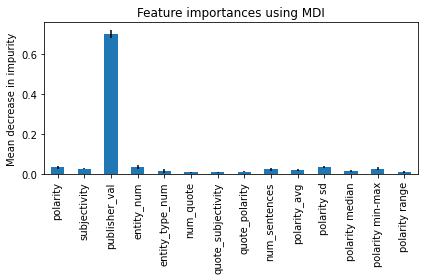

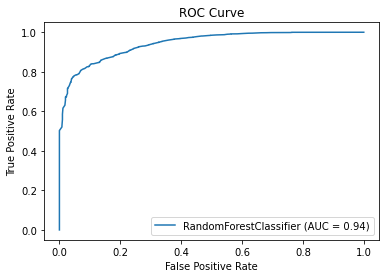

total time taken: 0:01:17.234907


In [197]:
# Standard Bagging
start = datetime.datetime.now()
print('Standard Bagging using the BaggingClassifier\n')
bc_model = BaggingClassifier(n_estimators=100)
analyze_model(bc_model, X, X_test, y_test, features)
end = datetime.datetime.now()
print(f'total time taken: {end-start}')

In [204]:
# Bagging with Random Undersampling
start = datetime.datetime.now()
print('Bagging with Random Undersampling using the BalancedBaggingClassifier\n')
bbc_model = BalancedBaggingClassifier(n_estimators=100)
analyze_model(bbc_model, X, X_test, y_test, features)
end = datetime.datetime.now()
print(f'total time taken: {end-start}')

Bagging with Random Undersampling using the BalancedBaggingClassifier

Accuracy Score: 0.9466699434750553

Feature Importance from Model
------------------------------


AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

Bagging with Random Undersampling using the BalancedBaggingClassifier

Accuracy Score: 0.9107888916195626

Feature Importance from Model
------------------------------
Feature: 0, Score: 0.06785
Feature: 1, Score: 0.06637
Feature: 2, Score: 0.28097
Feature: 3, Score: 0.06582
Feature: 4, Score: 0.03733
Feature: 5, Score: 0.02097
Feature: 6, Score: 0.02541
Feature: 7, Score: 0.02837
Feature: 8, Score: 0.05586
Feature: 9, Score: 0.06427
Feature: 10, Score: 0.08187
Feature: 11, Score: 0.06436
Feature: 12, Score: 0.07951
Feature: 13, Score: 0.06107


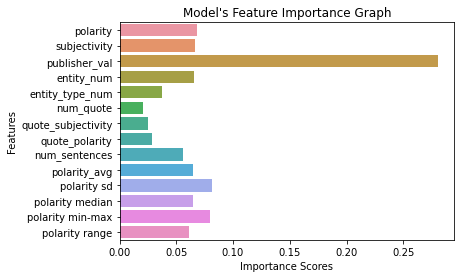

Permutation Feature Importance
------------------------------
Feature: 0, Score: 0.01277
Feature: 1, Score: 0.00870
Feature: 2, Score: 0.12482
Feature: 3, Score: 0.01442
Feature: 4, Score: 0.00190
Feature: 5, Score: 0.00117
Feature: 6, Score: 0.00166
Feature: 7, Score: 0.00183
Feature: 8, Score: 0.00728
Feature: 9, Score: 0.00432
Feature: 10, Score: 0.01854
Feature: 11, Score: 0.00237
Feature: 12, Score: 0.01440
Feature: 13, Score: 0.00235


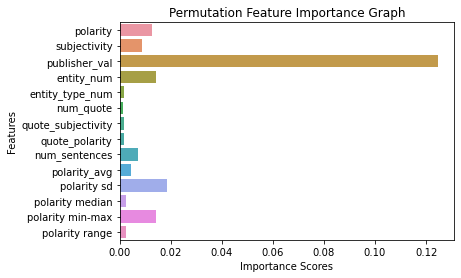

Feature Importance based on Mean Decrease in Impurity(MDI)
--------------------------------------------------

Classification Report:
----------------------
              precision    recall  f1-score   support

      medium       0.32      0.08      0.13      1386
        high       0.33      0.91      0.48      1339

   micro avg       0.33      0.49      0.39      2725
   macro avg       0.32      0.49      0.30      2725
weighted avg       0.32      0.49      0.30      2725


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,295,309
Actual Positive,54,3411



Classification Metrics:
-----------------------
True Positives: 3411
True Negatives: 295
False Positives: 309
False Negatives: 54

True Positive Rate: 0.9844155844155844
False Positive Rate: 0.5115894039735099

The 6 metrics:
---------------
Accuracy: 0.91
Mis-classification: 0.09
Sensitivity: 0.98
Specificty: 0.49
Precision: 0.92
F1 Score: 0.95

ROC AUC Score: 0.9986452659980686

Mean ROC AUC Score: 0.9528304439789913



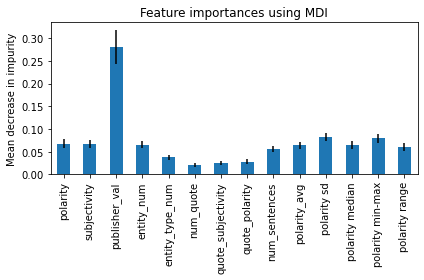

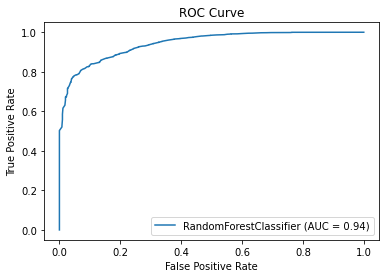

In [205]:
# Standard Random Forest
print('Bagging with Random Undersampling using the BalancedBaggingClassifier\n')
srfc_model = RandomForestClassifier(n_estimators=100)
analyze_model(srfc_model, X, X_test, y_test, features)

Accuracy Score: 0.9014499877119685

Feature Importance from Model
------------------------------
Feature: 0, Score: 0.06223
Feature: 1, Score: 0.06367
Feature: 2, Score: 0.33571
Feature: 3, Score: 0.05837
Feature: 4, Score: 0.03347
Feature: 5, Score: 0.01990
Feature: 6, Score: 0.02483
Feature: 7, Score: 0.02474
Feature: 8, Score: 0.05313
Feature: 9, Score: 0.06005
Feature: 10, Score: 0.07470
Feature: 11, Score: 0.05838
Feature: 12, Score: 0.07678
Feature: 13, Score: 0.05404


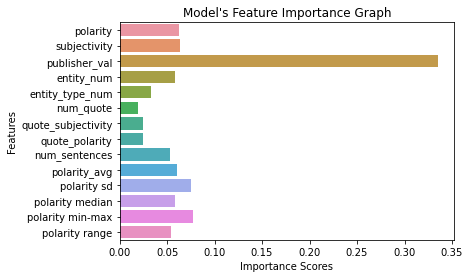

Permutation Feature Importance
------------------------------
Feature: 0, Score: 0.02068
Feature: 1, Score: 0.01676
Feature: 2, Score: 0.11600
Feature: 3, Score: 0.02720
Feature: 4, Score: 0.00559
Feature: 5, Score: 0.00343
Feature: 6, Score: 0.00368
Feature: 7, Score: 0.00175
Feature: 8, Score: 0.02011
Feature: 9, Score: 0.01765
Feature: 10, Score: 0.03277
Feature: 11, Score: 0.01504
Feature: 12, Score: 0.02855
Feature: 13, Score: 0.01478


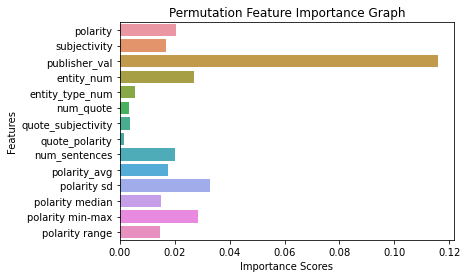

Feature Importance based on Mean Decrease in Impurity(MDI)
--------------------------------------------------

Classification Report:
----------------------
              precision    recall  f1-score   support

      medium       0.34      0.07      0.11      1379
        high       0.33      0.93      0.49      1364

   micro avg       0.33      0.50      0.40      2743
   macro avg       0.34      0.50      0.30      2743
weighted avg       0.34      0.50      0.30      2743


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,238,366
Actual Positive,35,3430



Classification Metrics:
-----------------------
True Positives: 3430
True Negatives: 238
False Positives: 366
False Negatives: 35

True Positive Rate: 0.98989898989899
False Positive Rate: 0.6059602649006622

The 6 metrics:
---------------
Accuracy: 0.9
Mis-classification: 0.1
Sensitivity: 0.99
Specificty: 0.39
Precision: 0.9
F1 Score: 0.94

ROC AUC Score: 0.9984217359458805

Mean ROC AUC Score: 0.9530028570364817



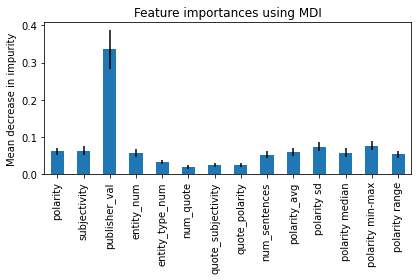

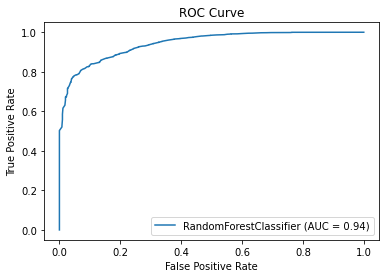

In [206]:
# Random Forest with Class Weighting
print('Random Forest with Class Weighting using the RandomForestClassifier\n')
rfc_cw_model = RandomForestClassifier(n_estimators=100, class_weight='balanced')
analyze_model(rfc_cw_model, X, X_test, y_test, features)

Accuracy Score: 0.9029245514868518

Feature Importance from Model
------------------------------
Feature: 0, Score: 0.06211
Feature: 1, Score: 0.06332
Feature: 2, Score: 0.32676
Feature: 3, Score: 0.05930
Feature: 4, Score: 0.03362
Feature: 5, Score: 0.02063
Feature: 6, Score: 0.02499
Feature: 7, Score: 0.02471
Feature: 8, Score: 0.05125
Feature: 9, Score: 0.06182
Feature: 10, Score: 0.07819
Feature: 11, Score: 0.05807
Feature: 12, Score: 0.07767
Feature: 13, Score: 0.05758


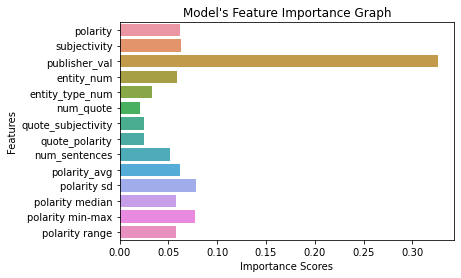

Permutation Feature Importance
------------------------------
Feature: 0, Score: 0.02272
Feature: 1, Score: 0.01767
Feature: 2, Score: 0.11141
Feature: 3, Score: 0.02850
Feature: 4, Score: 0.00642
Feature: 5, Score: 0.00521
Feature: 6, Score: 0.00331
Feature: 7, Score: 0.00187
Feature: 8, Score: 0.01941
Feature: 9, Score: 0.02194
Feature: 10, Score: 0.03483
Feature: 11, Score: 0.01417
Feature: 12, Score: 0.03345
Feature: 13, Score: 0.01544


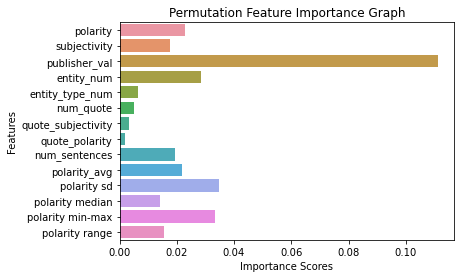

Feature Importance based on Mean Decrease in Impurity(MDI)
--------------------------------------------------

Classification Report:
----------------------
              precision    recall  f1-score   support

      medium       0.37      0.07      0.12      1334
        high       0.34      0.94      0.50      1376

   micro avg       0.34      0.51      0.41      2710
   macro avg       0.35      0.51      0.31      2710
weighted avg       0.35      0.51      0.31      2710


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,240,364
Actual Positive,31,3434



Classification Metrics:
-----------------------
True Positives: 3434
True Negatives: 240
False Positives: 364
False Negatives: 31

True Positive Rate: 0.9910533910533911
False Positive Rate: 0.6026490066225165

The 6 metrics:
---------------
Accuracy: 0.9
Mis-classification: 0.1
Sensitivity: 0.99
Specificty: 0.4
Precision: 0.9
F1 Score: 0.95

ROC AUC Score: 0.9982999331098042

Mean ROC AUC Score: 0.9526515001858744



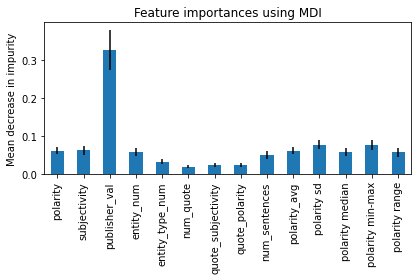

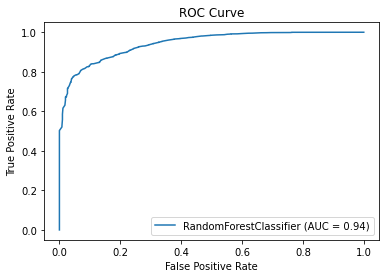

In [208]:
# Random Forest with Bootstrap Class Weighting
print('Random Forest with Bootstrap Class Weighting using the RandomForestClassifier\n')
rfc_bcw_model = RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample')
analyze_model(rfc_bcw_model, X, X_test, y_test, features)

Random Forest with Random Undersampling using the BalancedRandomForestClassifier

Accuracy Score: 0.78766281641681

Feature Importance from Model
------------------------------
Feature: 0, Score: 0.06411
Feature: 1, Score: 0.06244
Feature: 2, Score: 0.31495
Feature: 3, Score: 0.06136
Feature: 4, Score: 0.03513
Feature: 5, Score: 0.01994
Feature: 6, Score: 0.02609
Feature: 7, Score: 0.02452
Feature: 8, Score: 0.05255
Feature: 9, Score: 0.06222
Feature: 10, Score: 0.07765
Feature: 11, Score: 0.06159
Feature: 12, Score: 0.07874
Feature: 13, Score: 0.05870


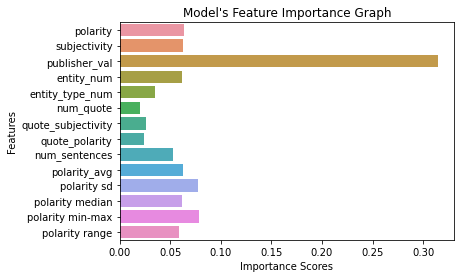

Permutation Feature Importance
------------------------------
Feature: 0, Score: 0.02984
Feature: 1, Score: 0.02320
Feature: 2, Score: 0.23119
Feature: 3, Score: 0.02469
Feature: 4, Score: 0.00860
Feature: 5, Score: 0.00818
Feature: 6, Score: 0.01229
Feature: 7, Score: 0.00552
Feature: 8, Score: 0.01664
Feature: 9, Score: 0.02202
Feature: 10, Score: 0.03822
Feature: 11, Score: 0.01984
Feature: 12, Score: 0.02353
Feature: 13, Score: 0.02133


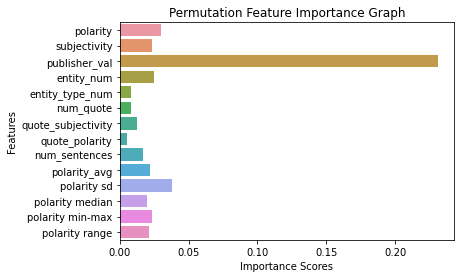

Feature Importance based on Mean Decrease in Impurity(MDI)
--------------------------------------------------

Classification Report:
----------------------
              precision    recall  f1-score   support

      medium       0.31      0.33      0.32      1309
        high       0.32      0.63      0.43      1354

   micro avg       0.32      0.48      0.38      2663
   macro avg       0.32      0.48      0.37      2663
weighted avg       0.32      0.48      0.37      2663


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,569,35
Actual Positive,829,2636



Classification Metrics:
-----------------------
True Positives: 2636
True Negatives: 569
False Positives: 35
False Negatives: 829

True Positive Rate: 0.7607503607503607
False Positive Rate: 0.057947019867549666

The 6 metrics:
---------------
Accuracy: 0.79
Mis-classification: 0.21
Sensitivity: 0.76
Specificty: 0.94
Precision: 0.99
F1 Score: 0.86

ROC AUC Score: 0.9950002904568016

Mean ROC AUC Score: 0.9526797641876341



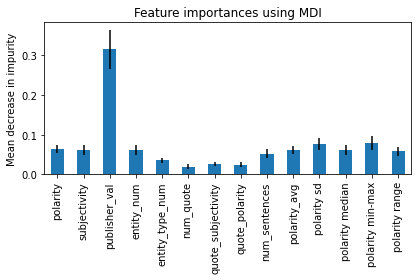

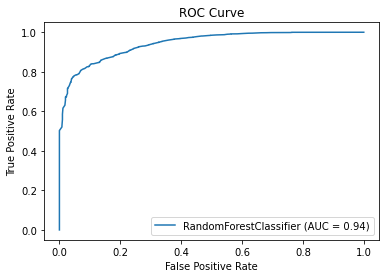

In [209]:
# Random Forest with Random Undersampling
print('Random Forest with Random Undersampling using the BalancedRandomForestClassifier\n')
brfc_model = BalancedRandomForestClassifier(n_estimators=100)
analyze_model(brfc_model, X, X_test, y_test, features)

In [213]:
# Easy Ensemble
print('Easy Ensemble using the EasyEnsembleClassifier\n')
eec_model = EasyEnsembleClassifier(n_estimators=100)
analyze_model(eec_model, X, X_test, y_test, features)

Easy Ensemble using the EasyEnsembleClassifier

Accuracy Score: 0.7571884984025559

Feature Importance from Model
------------------------------


AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X.fillna(0), y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('(Easy Ensemble) Mean ROC AUC: %.3f' % mean(scores))

# Generate new model based on most important features

Remember to remove least important features and only fit models with the most important features for prediction.

In [198]:
# import train_test_split
from sklearn.model_selection import train_test_split

# split dataset into features and labels
features = ['polarity', 'subjectivity', 'publisher_val']
labels   = ['cred_score']

X = df[features]
y = df[labels]

# split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [199]:
# generate new model on selected training data set

from sklearn.ensemble import RandomForestClassifier

# define and fit the new model
new_model = RandomForestClassifier(n_estimators=100)
new_model.fit(X_train.fillna(0), y_train.values.ravel())

# prediction on test set
y_pred = new_model.predict(X_test)

# import metrics for accuracy calculation
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9121917153673686
